In [333]:
import json
import csv
import pandas as pd
from pandas import DataFrame, Series
import dateutil.parser
from dateutil.tz import gettz
import datetime
import pytz
from functools import reduce
import time

In [334]:
tone_names = ['Sadness', 'Analytical', 'Joy', 'Fear', 'Tentative', 'Anger', 'Confident']
tone_names

['Sadness', 'Analytical', 'Joy', 'Fear', 'Tentative', 'Anger', 'Confident']

In [335]:
#keylogger DF

# local_tz = gettz('America/New_York')

# def utc_to_local(utc_dt):
#     return utc_dt.replace(tzinfo=local_tz)

# def roundTime(dt):
#     dt = dt - datetime.timedelta(minutes=dt.minute, seconds=dt.second, microseconds=dt.microsecond)
#     return dt

with open('../keylogger/logs/log_new.json', 'r') as f:
    keyloggerData = json.load(f)

# tzinfos = { "EDT" : gettz("America/New_York") }

def extract_keyloggerData(data):
    results = []

    for d in data:
        result = [0]*(len(tone_names) + 6)
        try:
            result[7] = d['word_count']
#             result[8] = d['uniqueword_count']
            result[8] = d['uniqueword_ratio']
#             result[9] = d['char_count']
            result[9] = d['backspace_count']
            result[10] = d['avg_dwelltime']
            result[11] = d['avg_flighttime']

            tones = d['document_tone']['tones']
            for i in range(len(tones)):
                score = tones[i]['score']
                tone_name = tones[i]['tone_name']
                tone_index = tone_names.index(tone_name)
                result[tone_index] = score            

#             time = utc_to_local(datetime.datetime.fromtimestamp(d['unix_time']))
#             result[-1] = time.gmtime(d['unix_time'])
            result[-1] = d['unix_time']

            results.append(tuple(result))
        except:
            continue
            
    return results

keyloggerDF = DataFrame(extract_keyloggerData(keyloggerData),
                        columns=[tone_name+"_score" for tone_name in tone_names] + ['word_count','uniqueword_ratio', 'backspace_count','avg_dwelltime','avg_flighttime','time'])
# keyloggerDF.time = keyloggerDF.time.apply(roundTime)
#keyloggerDF.time.apply(roundTime)
keyloggerDF

Sadness_score  Analytical_score  Joy_score  Fear_score  Tentative_score  \
0         0.000000          0.000000   0.000000    0.000000         0.852741   
1         0.000000          0.884635   0.000000    0.000000         0.539930   
2         0.548702          0.000000   0.659324    0.000000         0.000000   
3         0.000000          0.000000   0.000000    0.000000         0.000000   
4         0.000000          0.000000   0.000000    0.000000         0.715720   
5         0.555307          0.000000   0.654106    0.000000         0.936899   
6         0.542322          0.000000   0.000000    0.000000         0.991679   
7         0.000000          0.000000   0.775981    0.000000         0.000000   
8         0.000000          0.857009   0.636780    0.000000         0.000000   
9         0.000000          0.731297   0.618009    0.000000         0.000000   
10        0.000000          0.000000   0.655934    0.000000         0.000000   
11        0.571054          0.755423   0.595904    0.000000         0.647781   
12        0.000000          0.000000   0.000000    0.000000         0.920133   
13        0.578785          0.000000   0.000000    0.000000         0.770435   
14        0.548042          0.000000   0.592438    0.000000         0.822511   
15        0.527204          0.000000   0.618155    0.000000         0.789226   
16        0.582023          0.000000   0.000000    0.567726         0.906408   
17        0.000000          0.984450   0.000000    0.000000         0.000000   
18        0.000000          0.000000   0.618176    0.000000         0.971453   
19        0.000000          0.000000   0.000000    0.000000         0.972662   
20        0.525438          0.546015   0.607177    0.500880         0.645295   
21        0.000000          0.788671   0.654290    0.000000         0.000000   
22        0.560903          0.000000   0.594282    0.000000         0.696228   
23        0.513835          0.000000   0.615489    0.000000         0.921988   
24        0.537889          0.000000   0.583427    0.577339         0.772690   
25        0.659620          0.000000   0.606127    0.000000         0.692385   
26        0.000000          0.000000   0.000000    0.000000         0.808202   
27        0.512145          0.000000   0.642986    0.000000         0.747300   
28        0.000000          0.000000   0.000000    0.000000         0.000000   
29        0.000000          0.000000   0.000000    0.000000         0.997862   
..             ...               ...        ...         ...              ...   
381       0.000000          0.000000   0.000000    0.000000         0.000000   
382       0.000000          0.000000   0.000000    0.000000         0.000000   
383       0.000000          0.000000   0.000000    0.000000         0.000000   
384       0.505575          0.000000   0.000000    0.000000         0.000000   
385       0.549661          0.643758   0.000000    0.000000         0.000000   
386       0.893751          0.609405   0.000000    0.000000         0.000000   
387       0.593877          0.000000   0.501202    0.000000         0.939826   
388       0.520221          0.000000   0.000000    0.697449         0.000000   
389       0.000000          0.747663   0.000000    0.000000         0.000000   
390       0.000000          0.000000   0.000000    0.000000         0.000000   
391       0.000000          0.000000   0.000000    0.000000         0.000000   
392       0.572971          0.000000   0.621415    0.000000         0.822511   
393       0.555961          0.000000   0.602459    0.000000         0.693206   
394       0.605239          0.831435   0.547286    0.000000         0.571918   
395       0.851844          0.919252   0.000000    0.000000         0.985785   
396       0.000000          0.000000   0.000000    0.510824         0.571918   
397       0.000000          0.000000   0.546392    0.000000         0.000000   
398       0.000000          0.596122   0.677664    0.000000         0.000000   
399  

In [336]:
#affectiva DF

# local_tz = gettz('America/New_York')

# def utc_to_local(utc_dt):
#     return utc_dt.replace(tzinfo=local_tz)

with open('../affectiva/analyses/merged_file.json', 'r') as f:
    affectivaData = json.load(f)

for x in range(0, len(affectivaData)):
#         affectivaData[x]['time'] = time.gmtime(affectivaData[x]['time']/ 1e3)
        affectivaData[x]['time'] = affectivaData[x]['time']/ 1e3

#     affectivaData[x]['time'] = utc_to_local(datetime.datetime.fromtimestamp((affectivaData[x]['time']/ 1e3)))

affectivaDF = DataFrame(affectivaData)
# affectivaDF.time = affectivaDF.time.apply(roundTime)
# affectivaDF.time.apply(roundTime)
#affectivaDF.emoji = affectivaDF.emoji.apply(lambda x: ",".join(x))
del affectivaDF['emoji']
#affectivaDF.emotions = affectivaDF.emotions.apply(lambda x: ",".join(x))
del affectivaDF['emotions']
del affectivaDF['max_attention']
del affectivaDF['min_attention']
del affectivaDF['max_engagement']
del affectivaDF['min_engagement']
del affectivaDF['max_valence']
del affectivaDF['min_valence']
# affectivaDF.time = affectivaDF.time.apply(roundTime)

affectivaDF

avg_attention  avg_engagement  avg_valence  blinks          time
0        97.300607        0.089296    -0.003278       2  1.524779e+09
1        97.171321       24.342674    -1.190739       5  1.525204e+09
2        98.075239        1.411863    -0.749728      10  1.525365e+09
3        95.685710       12.829322    -2.966262       8  1.526346e+09
4        96.475466        4.153910    -4.402774       1  1.528174e+09
5        84.588569        8.368431    -2.101744       9  1.529620e+09
6        92.848527       29.437271    -4.706613      25  1.533246e+09
7        97.659079       17.868846    -6.528832       6  1.533708e+09
8        96.588857        5.755054    -2.220462       3  1.533828e+09
9        95.299089        9.000765     4.606062       0  1.534114e+09
10       97.217394        6.543252    -1.143010       1  1.523652e+09
11       97.862801        2.876466    -0.619689       0  1.534444e+09
12       97.748483        6.471629     3.748050       0  1.534995e+09
13       97.983653        2.639456     1.746162      11  1.535077e+09
14       97.898137       16.960085     4.343496      18  1.523813e+09
15       97.425244        0.535329    -0.124013       0  1.523830e+09
16       96.855229        0.481593    -0.178956       9  1.523845e+09
17       97.274278        0.140003    -0.000496       0  1.523914e+09
18       96.034359       13.339613    -0.489927      10  1.524016e+09
19       93.300173       70.932402    27.231514       7  1.524365e+09
20       93.129478       45.393398     9.055546       4  1.524516e+09
21       97.969019       10.275216    -4.754419       4  1.523550e+09
22       98.152039        0.444537    -0.088061       2  1.523501e+09
23       97.836906        4.123865     0.688605       0  1.529706e+09
24       95.037328        4.992223    -1.902489       0  1.533350e+09
25       94.758609       15.229898    -0.941095       0  1.533784e+09
26       96.276281       24.783771    -1.377947       0  1.533866e+09
27       96.225860        0.100521     0.000000       0  1.534309e+09
28       97.134323        6.061202    -1.310858       4  1.534569e+09
29       98.182900        1.032407     0.000000       0  1.535334e+09
..             ...             ...          ...     ...           ...
678      79.058653       88.924002   -10.683523       0  1.533003e+09
679      97.414030        0.738569     0.777678       0  1.533007e+09
680      97.111546        7.320833     1.071034       0  1.532667e+09
681      98.380449        0.272856     0.000000       7  1.523537e+09
682      98.134009        0.121371     0.029763       0  1.533054e+09
683      96.451615        0.263310    -0.159268       0  1.533058e+09
684      96.146533        3.036368     0.425778       1  1.533061e+09
685      97.593918        9.828914    -1.981809       2  1.533068e+09
686      65.598000       54.362685   -33.299462       0  1.533071e+09
687      87.036165       80.665010    32.574323       3  1.533082e+09
688      93.994737       16.828405    -1.981778       0  1.533134e+09
689      97.163239        3.419473    -0.556568       0  1.533140e+09
690      96.118002        5.207757    -0.021175       0  1.533144e+09
691      97.068263        8.282388    -3.734850       0  1.533152e+09
692      97.473893        7.410057    -0.098774       0  1.532670e+09
693      94.749909       90.345899    47.856526       0  1.523541e+09
694      95.658918        9.249617    -6.016930       0  1.533155e+09
695      97.452599        0.088180     0.042480       0  1.533159e+09
696      95.806487        0.190360     0.000000      10  1.533183e+09
697      97.814564        4.502256    -2.986939       1  1.533162e+09
698      96.426702        7.074698     1.369939       6  1.533186e+09
699      97.960733        0.081091     0.000000       0  1.533225e+09
700      97.668919        0.756154    -0.379849       6  1.533233e+09
701      96.927408       12.192245    -0.867387      13  1.533236e+09
702      97.306626        0.207807     0.000000       1  1.533228e+09
703      95.883

In [337]:
#mood reporter DF

responsesDF = pd.read_csv("../reporter/responses.tsv", sep='\t', header=0)

timeValues = responsesDF.unix_time.values

def roundUnixTime(timestamp):
    timestamp = timestamp - (timestamp % 3600)
    return timestamp

def convertTime(timestamp):
    timestamp = time.gmtime(timestamp)
    return timestamp

# for x in range(0, len(timeValues)):
#     timestamp = time.gmtime(timeValues[x])
#     print(timestamp)
#     timeValues[x] = timestamp

#     timeValues[x] = utc_to_local(datetime.datetime.fromtimestamp(timeValues[x]))
#     timeValues[x] = dateutil.parser.parse(timeValues[x] + " EDT", tzinfos=tzinfos)


# responsesData.time = timeValues
#responsesData.time = responsesData.time.apply(roundTime)

activity_names = list(set(list(map(lambda x: x.lower().strip(), reduce(lambda x,y: x+y, [x.split(",") for x in list(responsesDF.activity.values)])))))

for activity_name in activity_names:
    responsesDF[activity_name.replace(" ", "_") + "_activity"] = responsesDF.activity.apply(lambda x: activity_name in x.lower())

location_names = list(set(list(map(lambda x: x.lower().strip(), reduce(lambda x,y: x+y, [x.split(",") for x in list(responsesDF.location.values)])))))

def split_locations(locations):
    return list(map(lambda x: x.lower().strip(), locations.split(",")))

for location_name in location_names:
    responsesDF[location_name.replace(" ", "_") + "_location"] = responsesDF.location.apply(lambda x: location_name in split_locations(x))

# responsesDF.time = responsesDF.unix_time.apply(roundUnixTime)
# responsesDF.time = responsesDF.time.apply(convertTime)
responsesDF.time = responsesDF.unix_time

del responsesDF['moodNotes']
del responsesDF['trigger']
del responsesDF['activity']
del responsesDF['location']
del responsesDF['unix_time']


responsesDF

time  mood  unique_interactions  alone  morale  stress  fatigue  \
0    1.523283e+09   4.0                    1   True     4.0     3.0      1.0   
1    1.523286e+09   4.0                    1   True     4.0     3.0      1.0   
2    1.523290e+09   3.0                    1   True     3.0     2.0      1.0   
3    1.523299e+09   3.0                    2   True     3.0     2.0      4.0   
4    1.523307e+09   3.0                    0   True     3.0     2.0      3.0   
5    1.523311e+09   3.0                    0   True     3.0     2.0      4.0   
6    1.523318e+09   4.0                    2  False     3.0     2.0      4.0   
7    1.523340e+09   4.0                    2  False     4.0     2.0      2.0   
8    1.523379e+09   3.0                    2  False     3.0     3.0      3.0   
9    1.523383e+09   2.0                    1  False     2.0     3.0      4.0   
10   1.523389e+09   3.0                    2   True     2.0     3.0      4.0   
11   1.523400e+09   2.0                    0   True     2.0     4.0      5.0   
12   1.523404e+09   3.0                    1   True     3.0     3.0      3.0   
13   1.523409e+09   4.0                    2  False     3.0     2.0      4.0   
14   1.523420e+09   3.0                    1  False     3.0     3.0      2.0   
15   1.523455e+09   4.0                    5  False     4.0     3.0      2.0   
16   1.523459e+09   4.0                    1  False     4.0     3.0      2.0   
17   1.523463e+09   5.0                    3  False     4.0     3.0      2.0   
18   1.523473e+09   5.0                    6  False     4.0     2.0      2.0   
19   1.523485e+09   4.0                    1  False     4.0     3.0      2.0   
20   1.523495e+09   3.0                    2  False     3.0     3.0      5.0   
21   1.523508e+09   3.0                    1  False     3.0     2.0      3.0   
22   1.523539e+09   4.0                    1  False     3.0     2.0      2.0   
23   1.523547e+09   3.0                    1   True     3.0     4.0      2.0   
24   1.523551e+09   2.0                    0   True     3.0     4.0      2.0   
25   1.523555e+09   2.0                    0   True     2.0     4.0      2.0   
26   1.523559e+09   2.0                    0   True     3.0     4.0      2.0   
27   1.523566e+09   2.0                    0   True     2.0     4.0      3.0   
28   1.523570e+09   3.0                    1  False     3.0     2.0      3.0   
29   1.523581e+09   3.0                    1  False     3.0     2.0      4.0   
..            ...   ...                  ...    ...     ...     ...      ...   
631  1.535405e+09   2.5                    0   True     2.0     0.0      3.0   
632  1.535408e+09   3.0                    0   True     3.0     0.0      2.5   
633  1.535412e+09   2.5                    0   True     2.5     1.0      2.0   
634  1.535420e+09   3.0                    0   True     3.0     0.0      2.5   
635  1.535423e+09   3.0                    0   True     3.0     1.0      3.0   
636  1.535429e+09   2.5                    0   True     2.0     0.0      3.5   
637  1.535435e+09   2.5                    0   True     2.5     0.0      4.0   
638  1.535470e+09   3.0                    0   True     3.0     1.0      2.5   
639  1.535480e+09   3.0                    3  False     3.0     0.0      3.0   
640  1.535485e+09   2.5                    1  False     2.5     1.5      2.5   
641  1.535490e+09   3.0                    0  False     3.0     0.0      2.0   
642  1.535493e+09   3.0                    1  False     3.0     1.0      2.0   
643  1.535497e+09   3.0                    1  False     3.0     1.0      2.0   
644  1.535503e+09   2.5                    3   True     2.0     1.0      3.0   
645  1.535508e+09   2.0                    0   True     2.5     0.0      3.5   
646  1.535512e+09   3.0                    3   True     3.0     0.0      3.5   
647  1.535515e+09   2.5                    1   True     2.5     1.0      4.0   
648  1.535519e+09   3.0                    1   True     3.0     0.0      4.0   
649  1.535524

In [338]:
#productivity DF
from dateutil import parser
import calendar

with open('../getAPIdata/productivity.json', 'r') as f:
    productivityFile = json.load(f)

productivityData = productivityFile['rows']

final_productivityData = [];
UTC = pytz.timezone('UTC')

for x in range(0, len(productivityData)):
#     if(productivityData[x][0] > '2018-04-01T00:00:00'):
    date = parser.parse(productivityData[x][0])
    dateutc = str(date.astimezone(UTC))
    dateutc2 = dateutc[:19] + "UTC"
    newtime = time.strptime(dateutc2, "%Y-%m-%d %H:%M:%S%Z")
    finalTime = calendar.timegm(newtime)
    prod_score = productivityData[x][4]
    final_productivityData.append((finalTime, prod_score))

productivityDF = DataFrame(final_productivityData, columns=['time', 'productivity_score'])
#productivityDF.time = productivityDF.time.apply(roundTime)
# productivityDF.time.apply(roundTime)

productivityDF

time  productivity_score
0     1519880400               65.36
1     1519884000               95.82
2     1519887600               96.92
3     1519891200               97.36
4     1519912800               54.81
5     1519916400               98.92
6     1519920000               92.29
7     1519923600               49.20
8     1519927200               57.45
9     1519930800               46.54
10    1519934400               82.26
11    1519938000               51.23
12    1519941600               71.37
13    1519945200               44.25
14    1519948800               29.79
15    1519952400               34.86
16    1519956000               73.55
17    1519959600               63.58
18    1519963200               54.41
19    1519966800               58.28
20    1519970400               50.00
21    1519995600               53.13
22    1519999200               30.67
23    1520002800               31.70
24    1520006400               39.28
25    1520010000               53.73
26    1520013600               74.54
27    1520017200               93.81
28    1520020800               64.07
29    1520024400               27.59
...          ...                 ...
2529  1535436000               94.38
2530  1535468400              100.00
2531  1535468400               95.94
2532  1535475600               89.32
2533  1535482800               99.75
2534  1535486400               97.94
2535  1535490000               99.48
2536  1535493600               99.04
2537  1535500800               47.13
2538  1535504400               47.40
2539  1535508000               85.81
2540  1535511600               98.26
2541  1535515200               43.86
2542  1535518800               88.01
2543  1535522400               95.89
2544  1535526000               92.62
2545  1535554800               66.26
2546  1535558400               85.56
2547  1535562000               36.10
2548  1535576400               39.30
2549  1535580000               64.78
2550  1535583600               70.89
2551  1535587200               93.37
2552  1535590800               98.78
2553  1535594400               94.54
2554  1535598000               80.93
2555  1535601600               62.08
2556  1535601600               62.08
2557  1535641200               99.73
2558  1535644800               96.64

[2559 rows x 2 columns]

In [339]:
# add zeros

firstExerciseDF = pd.read_csv("../S_Health/new_exercise.tsv", sep='\t', header=0)

def convertTimeToStruct(timestamp):
    timestamp = time.gmtime(timestamp)
    return timestamp

def convertTimeToUnix(timestamp):
    timestamp = calendar.timegm(timestamp)
    return timestamp

firstExerciseDF.create_time = firstExerciseDF.create_time.apply(convertTimeToStruct)
firstExerciseDF.sort_values('create_time', inplace=True)
firstExerciseDF = firstExerciseDF.reset_index(drop=True)

exerciseCompressed = []
current_hour = firstExerciseDF['create_time'][0]
distance = 0
duration = 0
avg_speed = 0
# calorie = 0
entries = 0

for index, row in firstExerciseDF.iterrows():
    if (index == len(firstExerciseDF) -1):
        holder = [0] * 4
        holder[0] = current_hour
        holder[1] = distance
        holder[2] = duration
        holder[3] = avg_speed
#         holder[4] = calorie
        exerciseCompressed.append(tuple(holder))
    elif (row['create_time'].tm_year == current_hour.tm_year and row['create_time'].tm_mon == current_hour.tm_mon and row['create_time'].tm_mday == current_hour.tm_mday and row['create_time'].tm_hour == current_hour.tm_hour):
        distance += row['distance']
        duration += row['duration']
        avg_speed += row['mean_speed']
#         calorie += row['calorie']
        entries += 1
    else:
        holder = [0] * 4
        holder[0] = current_hour
        holder[1] = distance
        holder[2] = duration
        holder[3] = avg_speed / entries
#         holder[4] = calorie
        exerciseCompressed.append(tuple(holder))
        distance = 0
        duration = 0
        avg_speed = 0
#         calorie = 0
        entries = 0
        current_hour = row['create_time']
        distance += row['distance']
        duration += row['duration']
        avg_speed += row['mean_speed']
#         calorie += row['calorie']
        entries += 1

exerciseDF = DataFrame(exerciseCompressed, columns = ['time', 'walking_distance', 'walking_duration', 'avg_walking_speed'])
exerciseDF.time = exerciseDF.time.apply(convertTimeToUnix)

exerciseDF

time  walking_distance  walking_duration  avg_speed
0     1491884404        1578.95000           1333304   1.184239
1     1491933598         995.30000            786970   1.264724
2     1491952426        1606.88000           1217549   1.319766
3     1491955549        1255.97000            981144   1.280108
4     1491962730         985.59000            816940   1.206441
5     1492019355         982.68000            758000   1.296412
6     1492052512         935.58000            690072   1.355772
7     1492105932        1035.23000            768866   1.346438
8     1492127371        1987.36000           1543369   1.287676
9     1492135562        1125.59000            941428   1.195620
10    1492142100         964.20000            689313   1.398784
11    1492142924        1179.22000            917405   1.285386
12    1492149343        1125.64000            853343   1.319095
13    1492191718        1101.35000            762971   1.443502
14    1492223294         909.20000            676644   1.343690
15    1492231857        1374.93000           1151180   1.194366
16    1492237868        1635.14000           1388532   1.177603
17    1492241026         922.75000            667136   1.383151
18    1492290882         968.06000            677400   1.429082
19    1492299458         973.54000            732537   1.328998
20    1492310627        1590.43000           1712588   0.928670
21    1492381301        1005.56000            858512   1.171282
22    1492384356        1325.69010           1120632   1.182984
23    1492394541        1465.17000           1223071   1.197944
24    1492400098         878.30000            695834   1.262226
25    1492404253        1075.50000            828632   1.297922
26    1492470594        2655.64010           2092700   1.272432
27    1492535161         929.03000            660000   1.407621
28    1492568100        2287.02000           1874740   1.219913
29    1492573682        1014.58997            865130   1.172760
...          ...               ...               ...        ...
1037  1534487878         876.33000            720439   1.216383
1038  1534493268        4186.35000           3380077   1.238537
1039  1534574226        3951.62000           3351308   1.179128
1040  1534606420        1076.98000           1000200   1.076765
1041  1534634590        1083.66000            847543   1.278590
1042  1534644897         785.71000            707099   1.111174
1043  1534650003        1208.04000            934476   1.292746
1044  1534654259        1174.46000            941650   1.247236
1045  1534655933        1702.49000           1233281   1.380456
1046  1534718366         792.19000            680055   1.164891
1047  1534726500        1724.98000           1400108   1.232034
1048  1534727698         868.45000            665697   1.304573
1049  1534731319        2038.17000           1732070   1.182610
1050  1534736665         872.66000            727454   1.199609
1051  1534805373        1892.85000           1415607   1.337130
1052  1534818425        2271.08000           1777283   1.290742
1053  1534830174         931.74000            704508   1.322540
1054  1534831831        1083.33000            832946   1.300600
1055  1534888574         970.49000            730637   1.328279
1056  1534906231         833.26000            650768   1.280425
1057  1534915333        1496.87000           1242706   1.204525
1058  1534982537        1437.81000           1150346   1.249893
1059  1535005266        1529.28000           1263773   1.210091
1060  1535062761        1017.43000            817704   1.244252
1061  1535076071        2075.46000           1736296   1.198177
1062  1535085895        2655.13010           2213176   1.199692
1063  1535087944        1269.40000           1033582   1.228156
1064  1535157733         841.57000            699401   1.203272
1065  1535346814         749.06000            653646   1.145972
1066  1535488549         980.98000            786803   1.246793

[1067 rows x 4 columns]

In [340]:
import time 
import calendar

def convertTime(timestamp):
    timestamp = calendar.timegm(timestamp)
    return timestamp

qualityTimeDF = pd.read_csv("../QualityTime/1535646681367_ENTIRE_HISTORY_1472574678021_1535646678021.csv", header=0)
qtTimeVals = qualityTimeDF.End_Time.values

newQTtimeVals = []
for x in range(0, len(qtTimeVals)):
#     timestamp = int(qtTimeVals[x]) / 1e3
    timestamp = time.gmtime(int(qtTimeVals[x]) / 1e3)
#     time = utc_to_local(datetime.datetime.fromtimestamp((int(qtTimeVals[x])/ 1e3)))
    newQTtimeVals.append(timestamp)

    
usageVals = qualityTimeDF.Usage.values
newQTusageVals = []

for x in range(0, len(usageVals)):
    string = usageVals[x]
    minSubstring = "min"
    hrSubstring = "hr"
    finalSecs = 0
    
    if hrSubstring in string:
        removeHr = string[0:1]
        newHr = int(removeHr) * 3600
        finalSecs += newHr
    elif minSubstring in string:
        removeMin = string[-6:-4]
        newMin = int(removeMin) * 60
        finalSecs += newMin
    else:
        removeSec = string[0:-4]
        newSec = int(removeSec)
        finalSecs += newSec
        
    newQTusageVals.append(finalSecs)


qualityTimeDF.End_Time = newQTtimeVals
qualityTimeDF.Usage = newQTusageVals
qualityTimeDF = qualityTimeDF[['End_Time', 'Usage']]
qualityTimeDF.columns = ['time', 'usage_in_sec']

compressed = []
current_hour = qualityTimeDF['time'][0]
# current_hour = qualityTimeDF['time'][0].replace(microsecond=0,second=0,minute=0)
total_usage = 0
unlocks = 0

for index, row in qualityTimeDF.iterrows():
    if (index == len(qualityTimeDF) -1):
        holder = [0] * 3
        holder[0] = current_hour
        holder[1] = unlocks
        holder[2] = total_usage
        compressed.append(tuple(holder))
    elif (row['time'].tm_year == current_hour.tm_year and row['time'].tm_mon == current_hour.tm_mon and row['time'].tm_mday == current_hour.tm_mday and row['time'].tm_hour == current_hour.tm_hour):
        total_usage += row['usage_in_sec']
        unlocks +=1
    else:
        holder = [0] * 3
        holder[0] = current_hour
        holder[1] = unlocks
        holder[2] = total_usage
        compressed.append(tuple(holder))
        total_usage = 0
        unlocks = 0
        current_hour = row['time']
#         current_hour = row['time'].replace(microsecond=0,second=0,minute=0)
        total_usage += row['usage_in_sec']
        unlocks +=1
        

newQTDF = DataFrame(compressed, columns = ['time', 'phone_unlocks', 'phone_use_secs'])
newQTDF.time = newQTDF.time.apply(convertTime)
newQTDF

time  phone_unlocks  phone_use_secs
0     1526762346              9             108
1     1526763691             17             849
2     1526767604             19             940
3     1526770843              9             183
4     1526778616             16             554
5     1526782378              4             248
6     1526787273              4              79
7     1526790524              2               8
8     1526792495              1              60
9     1526839636              8             208
10    1526846501             10             276
11    1526852504              4              31
12    1526853852             19             222
13    1526857312              4             549
14    1526862131              1              13
15    1526868280              9            1647
16    1526874409              1              60
17    1526876652             11             148
18    1526882454              1              21
19    1526908998              8             757
20    1526915251             18            1232
21    1526918612             14            1028
22    1526922056             35             801
23    1526926083             18             672
24    1526932622              2              84
25    1526936047              3             130
26    1526936435             16             475
27    1526940050             36             379
28    1526943724             15             653
29    1526947726              8             169
...          ...            ...             ...
1568  1535497930              6            1086
1569  1535500841              9             168
1570  1535504962             12             360
1571  1535508024             10             619
1572  1535511610              2              35
1573  1535515306              2              60
1574  1535518992              1              60
1575  1535524113              1              50
1576  1535527713              8             207
1577  1535529710             70             362
1578  1535533443              1              20
1579  1535549727              1               3
1580  1535553695              9             331
1581  1535555087              8            1554
1582  1535559516             10             291
1583  1535562002             14             298
1584  1535566466             15             728
1585  1535569254             16             330
1586  1535572849             22             422
1587  1535576410              9             389
1588  1535581888              1              24
1589  1535584001             12             174
1590  1535596259              8             242
1591  1535599189             13             276
1592  1535601666             10             205
1593  1535606973              1              19
1594  1535627276              1              17
1595  1535634055              1               2
1596  1535639508              8             239
1597  1535641967              5             175

[1598 rows x 3 columns]

In [341]:
#tabcounter

with open('../getAPIdata/chromeactivity.json', 'r') as f:
    tabCounterData = json.load(f)

newTabData = []

for key in tabCounterData:
    timestamp = int(key) / 1e3

#     timestamp = time.gmtime(int(key) / 1e3)
#     time = utc_to_local(datetime.datetime.fromtimestamp((int(key)/ 1e3)))
    current_tabCount = tabCounterData[key]['current_tabCount']
    current_windowCount = tabCounterData[key]['current_windowCount']
    tabs_activated = tabCounterData[key]['tabs_activated']
    tabs_created = tabCounterData[key]['tabs_created']
    windows_created = tabCounterData[key]['windows_created']

    newTabData.append([timestamp, current_tabCount, current_windowCount,tabs_activated,tabs_created,windows_created])

tabColumns = ['time', 'current_tabCount', 'current_windowCount','tabs_activated','tabs_created','windows_created']
tabCounterDF = DataFrame(newTabData, columns=tabColumns)
# tabCounterDF.time = tabCounterDF.time.apply(roundTime)

tabCounterDF

time  current_tabCount  current_windowCount  tabs_activated  \
0     1.524982e+09                36                    2              87   
1     1.524983e+09                28                    1              24   
2     1.524987e+09                27                    1              19   
3     1.525025e+09                28                    1              29   
4     1.525029e+09                28                    1              44   
5     1.525030e+09                23                    1              54   
6     1.525032e+09                23                    1             143   
7     1.525033e+09                25                    1              25   
8     1.525042e+09                25                    1              74   
9     1.525042e+09                25                    0               0   
10    1.525043e+09                24                    1              29   
11    1.525044e+09                22                    1              20   
12    1.525047e+09                25                    1              70   
13    1.525048e+09                29                    2              22   
14    1.525050e+09                23                    1              69   
15    1.525051e+09                21                    1              20   
16    1.525057e+09                21                    1              21   
17    1.525058e+09                23                    1              18   
18    1.525102e+09                24                    1              28   
19    1.525104e+09                26                    1              91   
20    1.525105e+09                26                    1              33   
21    1.525109e+09                28                    1              14   
22    1.525109e+09                28                    0               0   
23    1.525112e+09                28                    1               3   
24    1.525113e+09                28                    1              43   
25    1.525115e+09                17                    1             100   
26    1.525116e+09                17                    1               6   
27    1.525119e+09                19                    1              73   
28    1.525120e+09                21                    1              15   
29    1.525122e+09                21                    1              56   
...            ...               ...                  ...             ...   
1729  1.535468e+09                35                    2              15   
1730  1.535471e+09                35                    2              15   
1731  1.535475e+09                37                    2              15   
1732  1.535478e+09                36                    2              32   
1733  1.535482e+09                34                    2              55   
1734  1.535485e+09                36                    2              74   
1735  1.535489e+09                37                    2              20   
1736  1.535492e+09                36                    2              15   
1737  1.535500e+09                35                    2              18   
1738  1.535503e+09                36                    2              47   
1739  1.535507e+09                36                    2              14   
1740  1.535510e+09                36                    2              35   
1741  1.535514e+09                39                    2              36   
1742  1.535518e+09                38                    2              44   
1743  1.535521e+09                38                    2              66   
1744  1.535525e+09                39                    2              64   
1745  1.535528e+09                37                    2              63   
1746  1.535557e+09                36                    2              14   
1747  1.535561e+09                36                    2              13   
1748  1.535564e+09                36                    2              31   
1749  1.53

In [342]:
# #QTDF
# responsesTimeVals = responsesDF.loc[:,'time']
# responsesTimeVals = responsesTimeVals.apply(roundTime)
# responsesTimeValsDF = DataFrame(responsesTimeVals)

# QTframes = [responsesTimeValsDF, newQTDF]
# QTresult = pd.concat(QTframes)
# QTresult.sort_values('time', inplace=True)
# QTresult = QTresult.reset_index(drop=True)
# QTresult = QTresult.fillna(0)

# QTresult

In [343]:
# merge all the data
import time

def convertTime(timestamp):
    timestamp = time.gmtime(timestamp)
    return timestamp

mergedData = []

all_columns = list(responsesDF.columns) + list(keyloggerDF.columns.drop('time')) + list(affectivaDF.columns.drop('time')) + list(productivityDF.columns.drop('time')) + list(tabCounterDF.columns.drop('time'))

def process_row(row):
    current_time = row['time']

    output_values = list(row.values)

    for other_df in [keyloggerDF, affectivaDF, productivityDF, tabCounterDF]:
        candidates = other_df[(current_time >= other_df['time']) &
                              (((current_time - other_df['time']) / 3600) < 3.5)]

#         candidates = other_df[(current_time >= other_df['time']) &
#                               (current_time - other_df['time'] < datetime.timedelta(hours=3.5))]
        if candidates.empty:
            return None
        else:
            index_of_max = candidates['time'].argmax()
            candidate = candidates.ix[index_of_max].drop('time')
            output_values += list(candidate.values)
    return output_values

for index, row in responsesDF.iterrows():
    processed_row = process_row(row)
    if processed_row is not None:
        mergedData.append(processed_row)

mergedDF = DataFrame(mergedData, columns = all_columns)

# mergedDF.time = mergedDF.time.apply(convertTime)
mergedDF

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


time  mood  unique_interactions  alone  morale  stress  fatigue  \
0    1.527742e+09   3.0                    0   True     2.0     0.0      3.5   
1    1.527972e+09   2.5                    3   True     2.0     2.0      1.5   
2    1.527981e+09   3.0                    1   True     2.5     1.0      1.0   
3    1.527985e+09   3.0                    0   True     3.0     0.0      1.5   
4    1.527989e+09   3.0                    0   True     2.5     0.0      1.5   
5    1.527993e+09   2.5                    0   True     2.0     0.0      2.0   
6    1.527996e+09   3.0                    0   True     3.0     0.0      2.5   
7    1.528000e+09   2.5                    1   True     2.0     0.0      3.0   
8    1.528052e+09   3.5                    2   True     3.5     0.0      1.5   
9    1.528060e+09   3.5                    0   True     4.0     0.5      2.0   
10   1.528080e+09   2.5                    1   True     2.0     0.0      4.5   
11   1.528083e+09   2.5                    0   True     1.5     0.5      4.5   
12   1.528089e+09   2.0                    0   True     1.0     2.5      4.5   
13   1.528132e+09   3.0                    1   True     2.5     0.5      1.5   
14   1.528136e+09   3.0                    0   True     3.0     0.0      1.5   
15   1.528139e+09   3.5                    1   True     4.0     0.0      2.0   
16   1.528143e+09   3.5                    2   True     3.0     1.0      2.0   
17   1.528147e+09   3.0                    1   True     3.0     0.5      1.5   
18   1.528157e+09   3.0                    3   True     3.0     0.5      2.5   
19   1.528161e+09   3.5                    3   True     3.0     0.5      2.5   
20   1.528165e+09   3.0                    3   True     3.0     0.5      3.0   
21   1.528169e+09   3.0                    0   True     2.0     0.5      4.0   
22   1.528173e+09   2.5                    0   True     1.0     0.0      4.5   
23   1.528177e+09   2.0                    0   True     1.0     0.0      4.5   
24   1.528242e+09   2.0                    2   True     1.0     0.0      4.5   
25   1.528245e+09   3.0                    3   True     2.0     1.0      4.5   
26   1.528250e+09   2.5                    3   True     1.0     0.5      5.0   
27   1.528307e+09   3.0                    0   True     3.0     0.0      1.5   
28   1.528325e+09   3.0                    2   True     2.0     0.0      3.0   
29   1.528333e+09   3.0                    0   True     2.0     0.0      3.0   
..            ...   ...                  ...    ...     ...     ...      ...   
252  1.535401e+09   3.0                    1   True     3.0     0.0      2.5   
253  1.535405e+09   2.5                    0   True     2.0     0.0      3.0   
254  1.535408e+09   3.0                    0   True     3.0     0.0      2.5   
255  1.535412e+09   2.5                    0   True     2.5     1.0      2.0   
256  1.535420e+09   3.0                    0   True     3.0     0.0      2.5   
257  1.535423e+09   3.0                    0   True     3.0     1.0      3.0   
258  1.535429e+09   2.5                    0   True     2.0     0.0      3.5   
259  1.535435e+09   2.5                    0   True     2.5     0.0      4.0   
260  1.535470e+09   3.0                    0   True     3.0     1.0      2.5   
261  1.535480e+09   3.0                    3  False     3.0     0.0      3.0   
262  1.535485e+09   2.5                    1  False     2.5     1.5      2.5   
263  1.535490e+09   3.0                    0  False     3.0     0.0      2.0   
264  1.535493e+09   3.0                    1  False     3.0     1.0      2.0   
265  1.535497e+09   3.0                    1  False     3.0     1.0      2.0   
266  1.535503e+09   2.5                    3   True     2.0     1.0      3.0   
267  1.535508e+09   2.0                    0   True     2.5     0.0      3.5   
268  1.535512e+09   3.0                    3   True     3.0     0.0      3.5   
269  1.535515e+09   2.5                    1   True     2.5     1.0      4.0   
270  1.535519

In [344]:
#QTDF

# newMergedDFtimevals = mergedDF.loc[:,'time']
# newMergedDF_copy = DataFrame(newMergedDFtimevals)


# QTframes = [newMergedDF_copy, newQTDF]
# QTresult = pd.concat(QTframes)
# QTresult.sort_values('time', inplace=True)
# QTresult = QTresult.reset_index(drop=True)
# QTresult = QTresult.fillna(0)


columns = list(mergedDF.columns) + list(newQTDF.columns.drop('time'))

def process_row(row):
    current_time = row['time']

    output_values = list(row.values)

    #for other_df in result:
    candidates = newQTDF[(current_time >= newQTDF['time']) &
                              (((current_time - newQTDF['time']) / 3600) <= 1.5)]
    if candidates.empty:
#         return None
        output_values += [0,0]
    else:
        index_of_max = candidates['time'].argmax()
        candidate = candidates.ix[index_of_max].drop('time')
        output_values += list(candidate.values)
    return output_values

newMergedData = []
for index, row in mergedDF.iterrows():
    processed_row = process_row(row)
    if processed_row is not None:
        newMergedData.append(processed_row)

newMergedDF = DataFrame(newMergedData, columns = columns)
newMergedDF
# pd.concat([newExerciseDF, mergedDF],axis=1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


time  mood  unique_interactions  alone  morale  stress  fatigue  \
0    1.527742e+09   3.0                    0   True     2.0     0.0      3.5   
1    1.527972e+09   2.5                    3   True     2.0     2.0      1.5   
2    1.527981e+09   3.0                    1   True     2.5     1.0      1.0   
3    1.527985e+09   3.0                    0   True     3.0     0.0      1.5   
4    1.527989e+09   3.0                    0   True     2.5     0.0      1.5   
5    1.527993e+09   2.5                    0   True     2.0     0.0      2.0   
6    1.527996e+09   3.0                    0   True     3.0     0.0      2.5   
7    1.528000e+09   2.5                    1   True     2.0     0.0      3.0   
8    1.528052e+09   3.5                    2   True     3.5     0.0      1.5   
9    1.528060e+09   3.5                    0   True     4.0     0.5      2.0   
10   1.528080e+09   2.5                    1   True     2.0     0.0      4.5   
11   1.528083e+09   2.5                    0   True     1.5     0.5      4.5   
12   1.528089e+09   2.0                    0   True     1.0     2.5      4.5   
13   1.528132e+09   3.0                    1   True     2.5     0.5      1.5   
14   1.528136e+09   3.0                    0   True     3.0     0.0      1.5   
15   1.528139e+09   3.5                    1   True     4.0     0.0      2.0   
16   1.528143e+09   3.5                    2   True     3.0     1.0      2.0   
17   1.528147e+09   3.0                    1   True     3.0     0.5      1.5   
18   1.528157e+09   3.0                    3   True     3.0     0.5      2.5   
19   1.528161e+09   3.5                    3   True     3.0     0.5      2.5   
20   1.528165e+09   3.0                    3   True     3.0     0.5      3.0   
21   1.528169e+09   3.0                    0   True     2.0     0.5      4.0   
22   1.528173e+09   2.5                    0   True     1.0     0.0      4.5   
23   1.528177e+09   2.0                    0   True     1.0     0.0      4.5   
24   1.528242e+09   2.0                    2   True     1.0     0.0      4.5   
25   1.528245e+09   3.0                    3   True     2.0     1.0      4.5   
26   1.528250e+09   2.5                    3   True     1.0     0.5      5.0   
27   1.528307e+09   3.0                    0   True     3.0     0.0      1.5   
28   1.528325e+09   3.0                    2   True     2.0     0.0      3.0   
29   1.528333e+09   3.0                    0   True     2.0     0.0      3.0   
..            ...   ...                  ...    ...     ...     ...      ...   
252  1.535401e+09   3.0                    1   True     3.0     0.0      2.5   
253  1.535405e+09   2.5                    0   True     2.0     0.0      3.0   
254  1.535408e+09   3.0                    0   True     3.0     0.0      2.5   
255  1.535412e+09   2.5                    0   True     2.5     1.0      2.0   
256  1.535420e+09   3.0                    0   True     3.0     0.0      2.5   
257  1.535423e+09   3.0                    0   True     3.0     1.0      3.0   
258  1.535429e+09   2.5                    0   True     2.0     0.0      3.5   
259  1.535435e+09   2.5                    0   True     2.5     0.0      4.0   
260  1.535470e+09   3.0                    0   True     3.0     1.0      2.5   
261  1.535480e+09   3.0                    3  False     3.0     0.0      3.0   
262  1.535485e+09   2.5                    1  False     2.5     1.5      2.5   
263  1.535490e+09   3.0                    0  False     3.0     0.0      2.0   
264  1.535493e+09   3.0                    1  False     3.0     1.0      2.0   
265  1.535497e+09   3.0                    1  False     3.0     1.0      2.0   
266  1.535503e+09   2.5                    3   True     2.0     1.0      3.0   
267  1.535508e+09   2.0                    0   True     2.5     0.0      3.5   
268  1.535512e+09   3.0                    3   True     3.0     0.0      3.5   
269  1.535515e+09   2.5                    1   True     2.5     1.0      4.0   
270  1.535519

In [345]:
#add exerciseDF


columns = list(newMergedDF.columns) + list(exerciseDF.columns.drop('time'))

def process_row(row):
    current_time = row['time']

    output_values = list(row.values)

    #for other_df in result:
    candidates = exerciseDF[(current_time >= exerciseDF['time']) &
                              (((current_time - exerciseDF['time']) / 3600) <= 1.5)]
    if candidates.empty:
#         return None
        output_values += [0,0,0]
    else:
        index_of_max = candidates['time'].argmax()
        candidate = candidates.ix[index_of_max].drop('time')
        output_values += list(candidate.values)
    return output_values

newestMergedData = []
for index, row in newMergedDF.iterrows():
    processed_row = process_row(row)
    if processed_row is not None:
        newestMergedData.append(processed_row)

newestMergedDF = DataFrame(newestMergedData, columns = columns)
newestMergedDF
# pd.concat([newExerciseDF, mergedDF],axis=1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


time  mood  unique_interactions  alone  morale  stress  fatigue  \
0    1.527742e+09   3.0                    0   True     2.0     0.0      3.5   
1    1.527972e+09   2.5                    3   True     2.0     2.0      1.5   
2    1.527981e+09   3.0                    1   True     2.5     1.0      1.0   
3    1.527985e+09   3.0                    0   True     3.0     0.0      1.5   
4    1.527989e+09   3.0                    0   True     2.5     0.0      1.5   
5    1.527993e+09   2.5                    0   True     2.0     0.0      2.0   
6    1.527996e+09   3.0                    0   True     3.0     0.0      2.5   
7    1.528000e+09   2.5                    1   True     2.0     0.0      3.0   
8    1.528052e+09   3.5                    2   True     3.5     0.0      1.5   
9    1.528060e+09   3.5                    0   True     4.0     0.5      2.0   
10   1.528080e+09   2.5                    1   True     2.0     0.0      4.5   
11   1.528083e+09   2.5                    0   True     1.5     0.5      4.5   
12   1.528089e+09   2.0                    0   True     1.0     2.5      4.5   
13   1.528132e+09   3.0                    1   True     2.5     0.5      1.5   
14   1.528136e+09   3.0                    0   True     3.0     0.0      1.5   
15   1.528139e+09   3.5                    1   True     4.0     0.0      2.0   
16   1.528143e+09   3.5                    2   True     3.0     1.0      2.0   
17   1.528147e+09   3.0                    1   True     3.0     0.5      1.5   
18   1.528157e+09   3.0                    3   True     3.0     0.5      2.5   
19   1.528161e+09   3.5                    3   True     3.0     0.5      2.5   
20   1.528165e+09   3.0                    3   True     3.0     0.5      3.0   
21   1.528169e+09   3.0                    0   True     2.0     0.5      4.0   
22   1.528173e+09   2.5                    0   True     1.0     0.0      4.5   
23   1.528177e+09   2.0                    0   True     1.0     0.0      4.5   
24   1.528242e+09   2.0                    2   True     1.0     0.0      4.5   
25   1.528245e+09   3.0                    3   True     2.0     1.0      4.5   
26   1.528250e+09   2.5                    3   True     1.0     0.5      5.0   
27   1.528307e+09   3.0                    0   True     3.0     0.0      1.5   
28   1.528325e+09   3.0                    2   True     2.0     0.0      3.0   
29   1.528333e+09   3.0                    0   True     2.0     0.0      3.0   
..            ...   ...                  ...    ...     ...     ...      ...   
252  1.535401e+09   3.0                    1   True     3.0     0.0      2.5   
253  1.535405e+09   2.5                    0   True     2.0     0.0      3.0   
254  1.535408e+09   3.0                    0   True     3.0     0.0      2.5   
255  1.535412e+09   2.5                    0   True     2.5     1.0      2.0   
256  1.535420e+09   3.0                    0   True     3.0     0.0      2.5   
257  1.535423e+09   3.0                    0   True     3.0     1.0      3.0   
258  1.535429e+09   2.5                    0   True     2.0     0.0      3.5   
259  1.535435e+09   2.5                    0   True     2.5     0.0      4.0   
260  1.535470e+09   3.0                    0   True     3.0     1.0      2.5   
261  1.535480e+09   3.0                    3  False     3.0     0.0      3.0   
262  1.535485e+09   2.5                    1  False     2.5     1.5      2.5   
263  1.535490e+09   3.0                    0  False     3.0     0.0      2.0   
264  1.535493e+09   3.0                    1  False     3.0     1.0      2.0   
265  1.535497e+09   3.0                    1  False     3.0     1.0      2.0   
266  1.535503e+09   2.5                    3   True     2.0     1.0      3.0   
267  1.535508e+09   2.0                    0   True     2.5     0.0      3.5   
268  1.535512e+09   3.0                    3   True     3.0     0.0      3.5   
269  1.535515e+09   2.5                    1   True     2.5     1.0      4.0   
270  1.535519

In [353]:
def hourOnly(timestamp):
    timestamp = timestamp.hour
    if (timestamp < 6):
        timestamp = timestamp + 24
    return timestamp



hourColumn = pd.to_datetime(newestMergedDF.time, unit='s')
hourColumn = hourColumn.apply(hourOnly)
hourColumn

0      28
1      20
2      23
3      24
4      25
5      26
6      27
7      28
8      19
9      21
10     26
11     27
12     29
13     17
14     18
15     19
16     20
17     21
18     24
19     25
20     26
21     27
22     28
23     29
24     23
25     24
26     25
27     17
28     22
29     25
       ..
252    20
253    21
254    22
255    23
256    25
257    26
258    28
259    29
260    15
261    18
262    19
263    20
264    21
265    22
266    24
267    25
268    26
269    28
270    29
271     6
272     7
273    16
274    17
275    21
276    22
277    23
278    24
279    25
280    27
281    16
Name: time, Length: 282, dtype: int64

In [354]:
newestMergedDF = newestMergedDF.assign(time_of_day=pd.Series(hourColumn).values)
newestMergedDF

time  mood  unique_interactions  alone  morale  stress  fatigue  \
0    1.527742e+09   3.0                    0   True     2.0     0.0      3.5   
1    1.527972e+09   2.5                    3   True     2.0     2.0      1.5   
2    1.527981e+09   3.0                    1   True     2.5     1.0      1.0   
3    1.527985e+09   3.0                    0   True     3.0     0.0      1.5   
4    1.527989e+09   3.0                    0   True     2.5     0.0      1.5   
5    1.527993e+09   2.5                    0   True     2.0     0.0      2.0   
6    1.527996e+09   3.0                    0   True     3.0     0.0      2.5   
7    1.528000e+09   2.5                    1   True     2.0     0.0      3.0   
8    1.528052e+09   3.5                    2   True     3.5     0.0      1.5   
9    1.528060e+09   3.5                    0   True     4.0     0.5      2.0   
10   1.528080e+09   2.5                    1   True     2.0     0.0      4.5   
11   1.528083e+09   2.5                    0   True     1.5     0.5      4.5   
12   1.528089e+09   2.0                    0   True     1.0     2.5      4.5   
13   1.528132e+09   3.0                    1   True     2.5     0.5      1.5   
14   1.528136e+09   3.0                    0   True     3.0     0.0      1.5   
15   1.528139e+09   3.5                    1   True     4.0     0.0      2.0   
16   1.528143e+09   3.5                    2   True     3.0     1.0      2.0   
17   1.528147e+09   3.0                    1   True     3.0     0.5      1.5   
18   1.528157e+09   3.0                    3   True     3.0     0.5      2.5   
19   1.528161e+09   3.5                    3   True     3.0     0.5      2.5   
20   1.528165e+09   3.0                    3   True     3.0     0.5      3.0   
21   1.528169e+09   3.0                    0   True     2.0     0.5      4.0   
22   1.528173e+09   2.5                    0   True     1.0     0.0      4.5   
23   1.528177e+09   2.0                    0   True     1.0     0.0      4.5   
24   1.528242e+09   2.0                    2   True     1.0     0.0      4.5   
25   1.528245e+09   3.0                    3   True     2.0     1.0      4.5   
26   1.528250e+09   2.5                    3   True     1.0     0.5      5.0   
27   1.528307e+09   3.0                    0   True     3.0     0.0      1.5   
28   1.528325e+09   3.0                    2   True     2.0     0.0      3.0   
29   1.528333e+09   3.0                    0   True     2.0     0.0      3.0   
..            ...   ...                  ...    ...     ...     ...      ...   
252  1.535401e+09   3.0                    1   True     3.0     0.0      2.5   
253  1.535405e+09   2.5                    0   True     2.0     0.0      3.0   
254  1.535408e+09   3.0                    0   True     3.0     0.0      2.5   
255  1.535412e+09   2.5                    0   True     2.5     1.0      2.0   
256  1.535420e+09   3.0                    0   True     3.0     0.0      2.5   
257  1.535423e+09   3.0                    0   True     3.0     1.0      3.0   
258  1.535429e+09   2.5                    0   True     2.0     0.0      3.5   
259  1.535435e+09   2.5                    0   True     2.5     0.0      4.0   
260  1.535470e+09   3.0                    0   True     3.0     1.0      2.5   
261  1.535480e+09   3.0                    3  False     3.0     0.0      3.0   
262  1.535485e+09   2.5                    1  False     2.5     1.5      2.5   
263  1.535490e+09   3.0                    0  False     3.0     0.0      2.0   
264  1.535493e+09   3.0                    1  False     3.0     1.0      2.0   
265  1.535497e+09   3.0                    1  False     3.0     1.0      2.0   
266  1.535503e+09   2.5                    3   True     2.0     1.0      3.0   
267  1.535508e+09   2.0                    0   True     2.5     0.0      3.5   
268  1.535512e+09   3.0                    3   True     3.0     0.0      3.5   
269  1.535515e+09   2.5                    1   True     2.5     1.0      4.0   
270  1.535519

In [355]:
newestMergedDF = newestMergedDF.fillna(0)

In [356]:
newestMergedDF

time  mood  unique_interactions  alone  morale  stress  fatigue  \
0    1.527742e+09   3.0                    0   True     2.0     0.0      3.5   
1    1.527972e+09   2.5                    3   True     2.0     2.0      1.5   
2    1.527981e+09   3.0                    1   True     2.5     1.0      1.0   
3    1.527985e+09   3.0                    0   True     3.0     0.0      1.5   
4    1.527989e+09   3.0                    0   True     2.5     0.0      1.5   
5    1.527993e+09   2.5                    0   True     2.0     0.0      2.0   
6    1.527996e+09   3.0                    0   True     3.0     0.0      2.5   
7    1.528000e+09   2.5                    1   True     2.0     0.0      3.0   
8    1.528052e+09   3.5                    2   True     3.5     0.0      1.5   
9    1.528060e+09   3.5                    0   True     4.0     0.5      2.0   
10   1.528080e+09   2.5                    1   True     2.0     0.0      4.5   
11   1.528083e+09   2.5                    0   True     1.5     0.5      4.5   
12   1.528089e+09   2.0                    0   True     1.0     2.5      4.5   
13   1.528132e+09   3.0                    1   True     2.5     0.5      1.5   
14   1.528136e+09   3.0                    0   True     3.0     0.0      1.5   
15   1.528139e+09   3.5                    1   True     4.0     0.0      2.0   
16   1.528143e+09   3.5                    2   True     3.0     1.0      2.0   
17   1.528147e+09   3.0                    1   True     3.0     0.5      1.5   
18   1.528157e+09   3.0                    3   True     3.0     0.5      2.5   
19   1.528161e+09   3.5                    3   True     3.0     0.5      2.5   
20   1.528165e+09   3.0                    3   True     3.0     0.5      3.0   
21   1.528169e+09   3.0                    0   True     2.0     0.5      4.0   
22   1.528173e+09   2.5                    0   True     1.0     0.0      4.5   
23   1.528177e+09   2.0                    0   True     1.0     0.0      4.5   
24   1.528242e+09   2.0                    2   True     1.0     0.0      4.5   
25   1.528245e+09   3.0                    3   True     2.0     1.0      4.5   
26   1.528250e+09   2.5                    3   True     1.0     0.5      5.0   
27   1.528307e+09   3.0                    0   True     3.0     0.0      1.5   
28   1.528325e+09   3.0                    2   True     2.0     0.0      3.0   
29   1.528333e+09   3.0                    0   True     2.0     0.0      3.0   
..            ...   ...                  ...    ...     ...     ...      ...   
252  1.535401e+09   3.0                    1   True     3.0     0.0      2.5   
253  1.535405e+09   2.5                    0   True     2.0     0.0      3.0   
254  1.535408e+09   3.0                    0   True     3.0     0.0      2.5   
255  1.535412e+09   2.5                    0   True     2.5     1.0      2.0   
256  1.535420e+09   3.0                    0   True     3.0     0.0      2.5   
257  1.535423e+09   3.0                    0   True     3.0     1.0      3.0   
258  1.535429e+09   2.5                    0   True     2.0     0.0      3.5   
259  1.535435e+09   2.5                    0   True     2.5     0.0      4.0   
260  1.535470e+09   3.0                    0   True     3.0     1.0      2.5   
261  1.535480e+09   3.0                    3  False     3.0     0.0      3.0   
262  1.535485e+09   2.5                    1  False     2.5     1.5      2.5   
263  1.535490e+09   3.0                    0  False     3.0     0.0      2.0   
264  1.535493e+09   3.0                    1  False     3.0     1.0      2.0   
265  1.535497e+09   3.0                    1  False     3.0     1.0      2.0   
266  1.535503e+09   2.5                    3   True     2.0     1.0      3.0   
267  1.535508e+09   2.0                    0   True     2.5     0.0      3.5   
268  1.535512e+09   3.0                    3   True     3.0     0.0      3.5   
269  1.535515e+09   2.5                    1   True     2.5     1.0      4.0   
270  1.535519

In [357]:
newestMergedDF.to_csv("mergedDF.csv", sep='\t', encoding='utf-8')

In [358]:
corr = newestMergedDF.corr().fillna(0)
corr.to_csv("correlationmatrix.csv", sep='\t', encoding='utf-8')

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


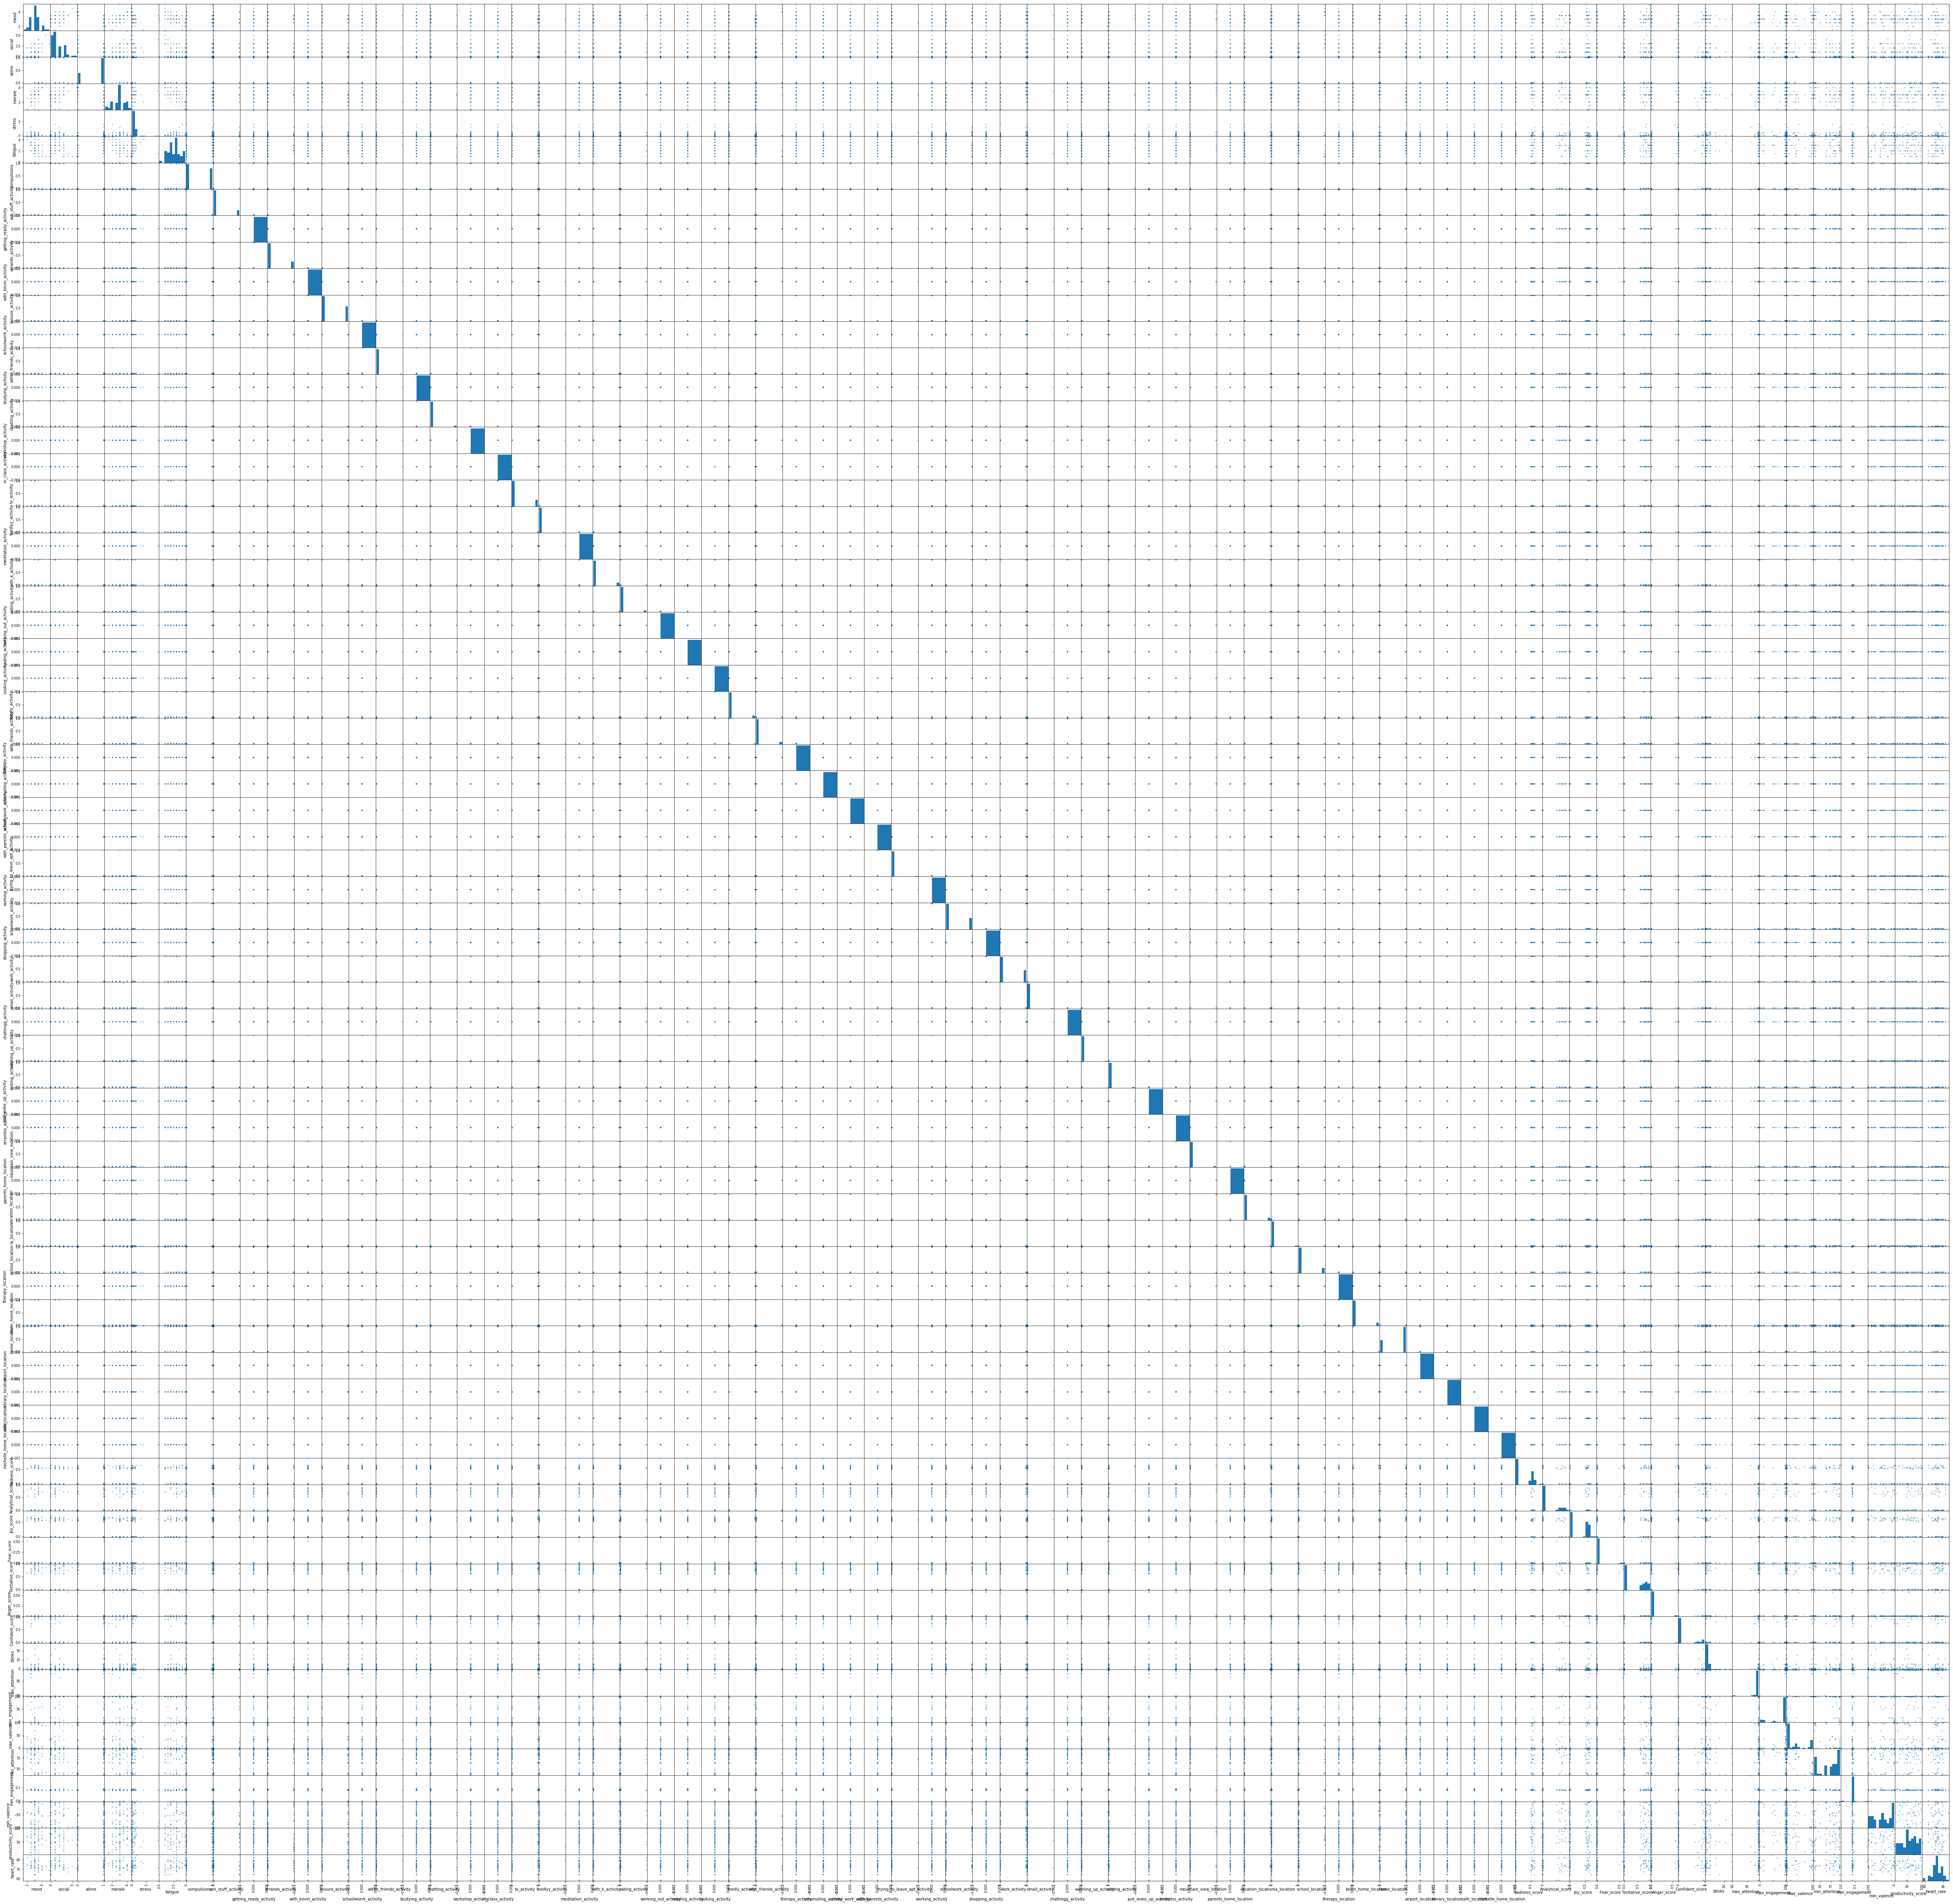

In [58]:
import matplotlib
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(newMergedDF, figsize=(88, 88))
plt.show()

In [16]:
# plt.figure(figsize=(88,88))
# plt.matshow(mergedDF.corr())
# plt.xticks(range(len(mergedDF.columns)), mergedDF.columns)
# plt.yticks(range(len(mergedDF.columns)), mergedDF.columns)
# plt.colorbar()
# plt.show()

In [284]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '30px', 'min-width': '60px', 'min-height': '60px', 'max-height': '60px', 'font-size': '8pt', 'padding': '1em 1em'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
#     .set_table_styles(magnify())

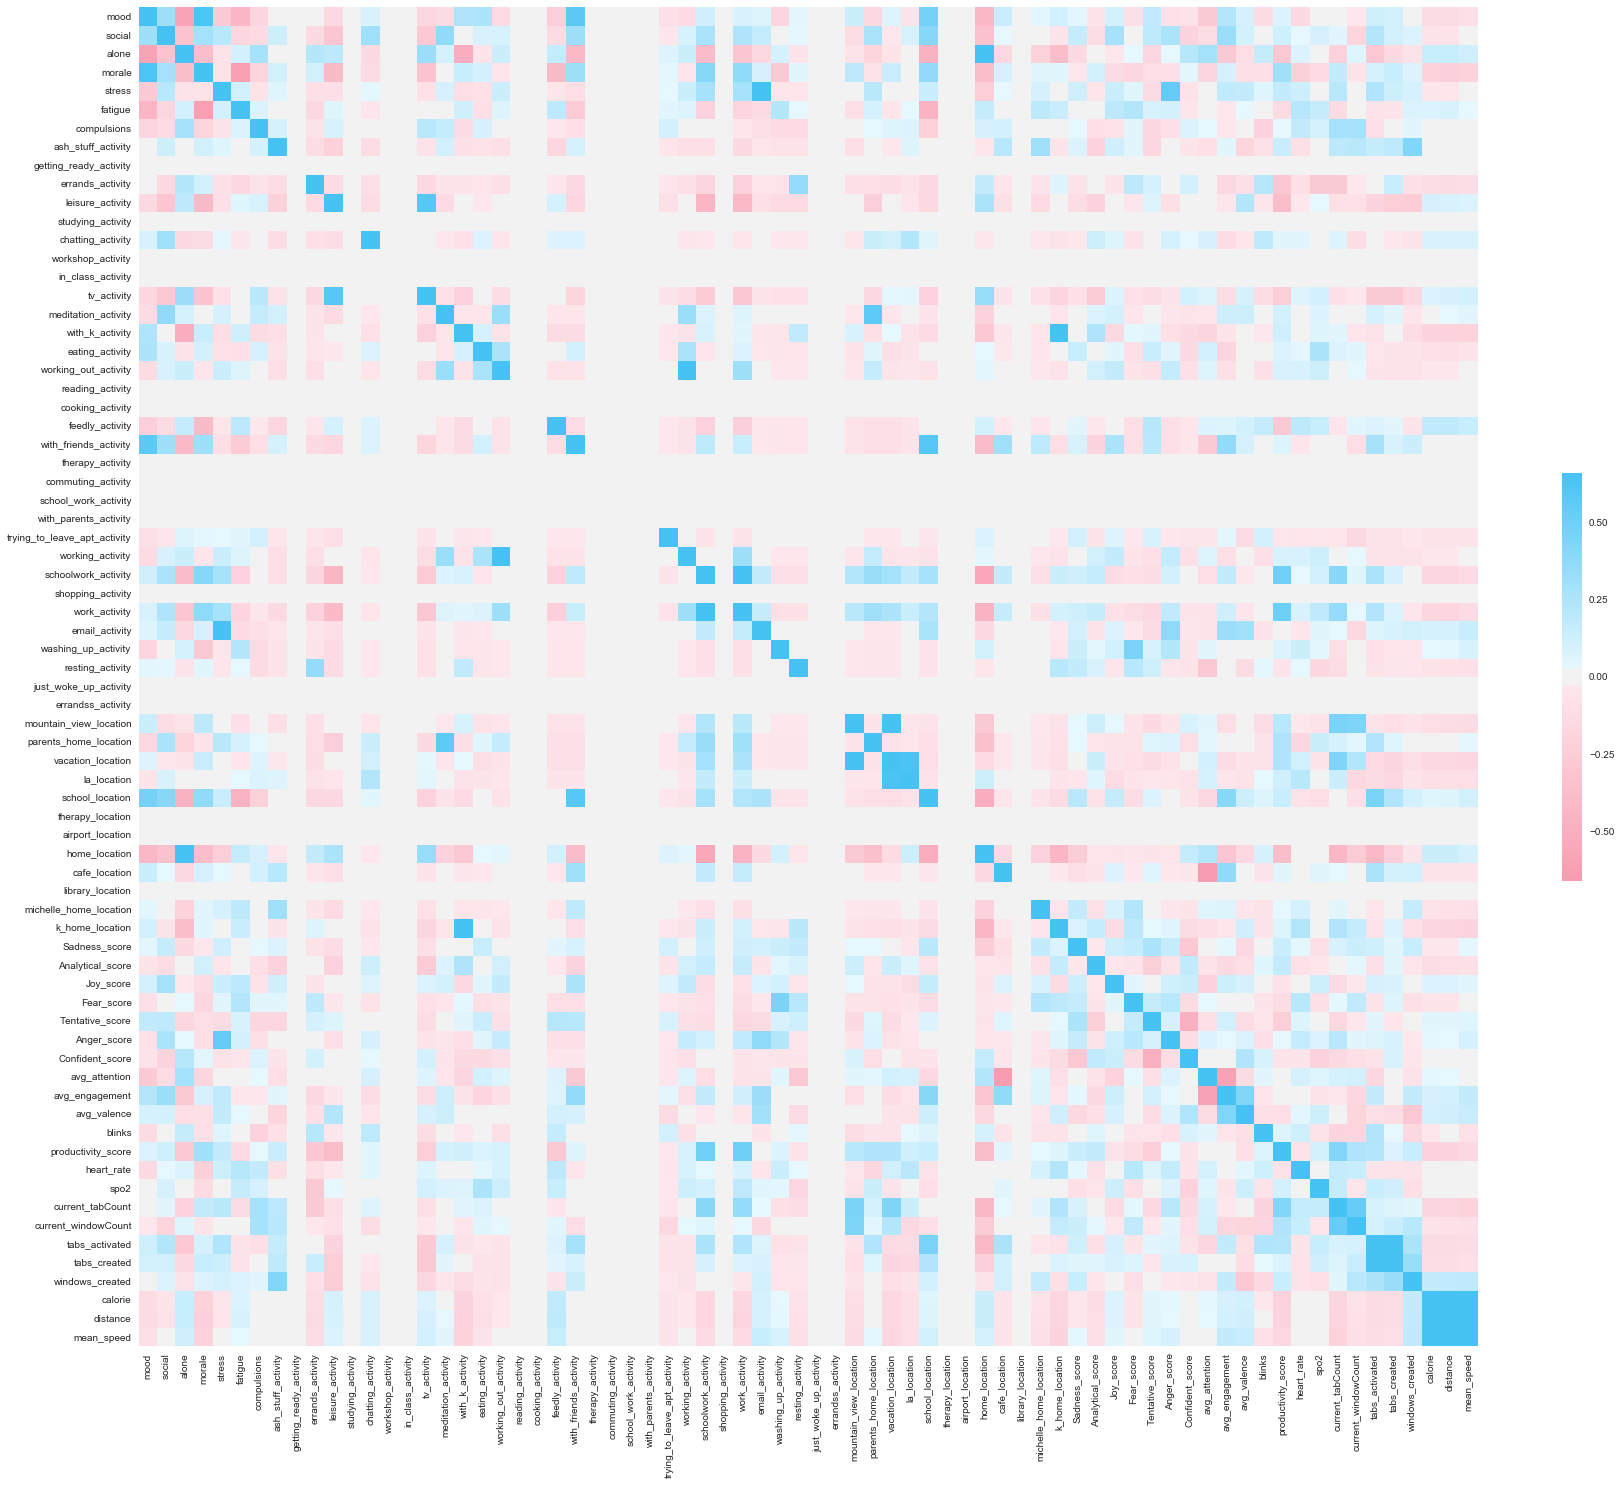

In [343]:
import seaborn as sns
%matplotlib inline
import numpy as np

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 25))

# ax.set_axis_bgcolor("white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(359, 230, s=88, l=74, sep=10, n=9, as_cmap=True)
sns.set_style("white")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0, cbar_kws={"shrink": 0.3})